<a href="https://colab.research.google.com/github/Isuru-rangana/Deep-Learning-Assignment/blob/main/Ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [5]:
data = pd.read_csv('/content/drive/MyDrive/DL/hour.csv')

In [6]:
features = ['temp', 'atemp', 'hum', 'windspeed', 'season', 'holiday', 'weekday', 'workingday', 'weathersit', 'hr']
target = ['cnt']

X = data[features].values  # Feature matrix
y = data[target].values  # Target variable


In [7]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)


In [9]:
# Build the ANN model
model = Sequential()

In [10]:
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

In [12]:
model.add(Dense(1))  # Single output for 'cnt' prediction

In [13]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [14]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0263 - val_loss: 0.0175
Epoch 2/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0170 - val_loss: 0.0148
Epoch 3/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0148 - val_loss: 0.0127
Epoch 4/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0120 - val_loss: 0.0106
Epoch 5/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0094 - val_loss: 0.0087
Epoch 6/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0083 - val_loss: 0.0075
Epoch 7/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0077 - val_loss: 0.0076
Epoch 8/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0071 - val_loss: 0.0066
Epoch 9/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0070 - val_loss: 0.0089
Epoch 10/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0066 - val_loss: 0.0066
Epoch 11/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0063 - val_loss: 0.0064
Epoch 12/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [15]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0050
Test Loss: 0.005452021025121212


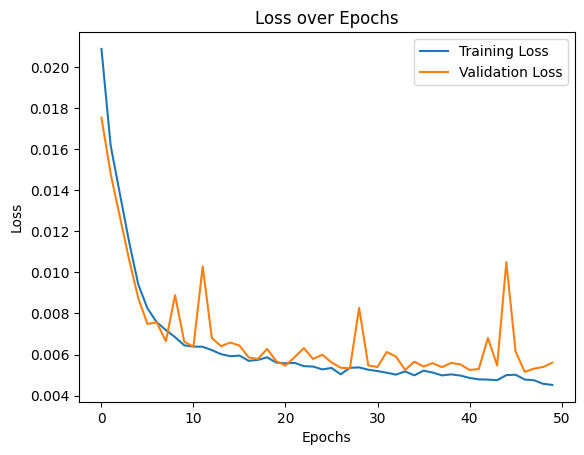

In [16]:
# Visualize the training process
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
# Make predictions on test data
predictions = model.predict(X_test)

109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [18]:
# Reverse the scaling of predictions
predictions_inverse = scaler.inverse_transform(predictions)
y_test_inverse = scaler.inverse_transform(y_test)

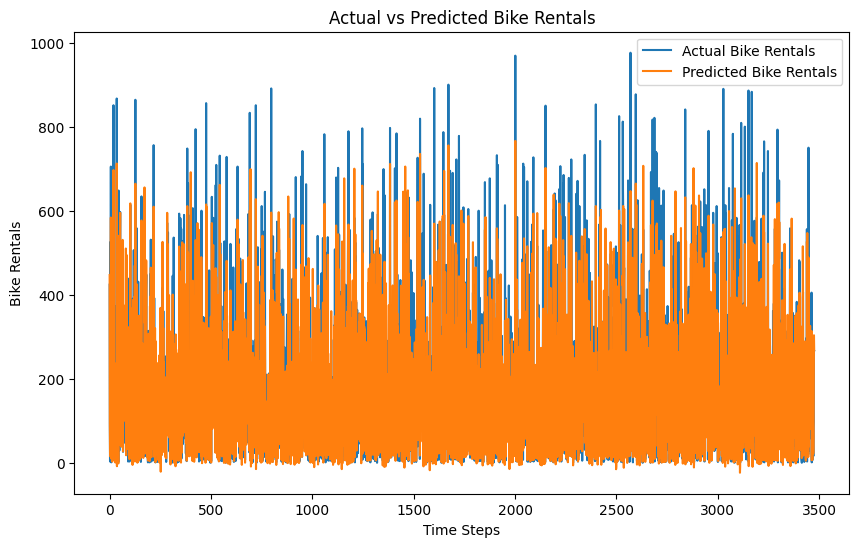

In [19]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_inverse, label='Actual Bike Rentals')
plt.plot(predictions_inverse, label='Predicted Bike Rentals')
plt.title('Actual vs Predicted Bike Rentals')
plt.xlabel('Time Steps')
plt.ylabel('Bike Rentals')
plt.legend()
plt.show()